# UMAP Eigenfunction Approximation with Chebyshev Polynomials

It appears that there's a "max connectivity weight" - 1.

In [117]:
from sklearn.datasets import make_moons
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE, SpectralEmbedding
from umap import UMAP

import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx
import pickle
import scipy.linalg as spla

from MoonsMLP import MoonsMLP

torch.set_printoptions(precision=4)
np.set_printoptions(precision=2)

### Noisy Half-Moons, Partially Labeled

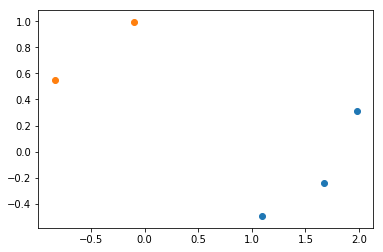

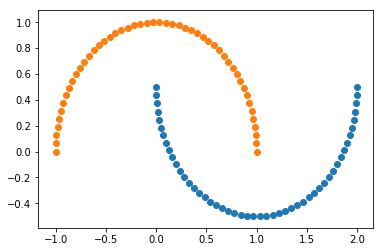

In [113]:
def plot_moons(X, y):
    top = (y == 0)
    bottom = (y == 1)
    plt.scatter(X[bottom,0], X[bottom,1])
    plt.scatter(X[top,0], X[top,1])
    plt.show()
    
n_total = 100
n_labeled = 5
noise = 0
X, y = make_moons(n_samples=n_total, noise=noise)
Xl, yl = X[:n_labeled], y[:n_labeled]
Xu, yu = X[n_labeled:], y[n_labeled:]
plot_moons(Xl, yl)
plot_moons(X, y)

UMAP(a=None, angular_rp_forest=False, b=None, init='spectral',
   learning_rate=1.0, local_connectivity=1.0, metric='euclidean',
   metric_kwds=None, min_dist=0.1, n_components=2, n_epochs=None,
   n_neighbors=2, negative_sample_rate=5, random_state=None,
   repulsion_strength=1.0, set_op_mix_ratio=1.0, spread=1.0,
   target_metric='categorical', target_metric_kwds=None,
   target_n_neighbors=-1, target_weight=0.5, transform_queue_size=4.0,
   transform_seed=42, verbose=False)


/home/jared/.local/lib/python3.6/site-packages/umap/spectral.py:229: UserWarning: Embedding a total of 2 separate connected components using meta-embedding (experimental)
  n_components


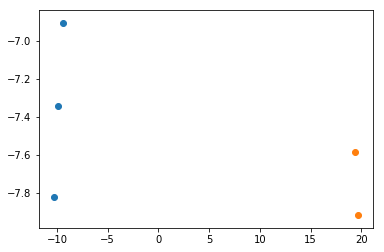

[[0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 1.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]]


/home/jared/.local/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


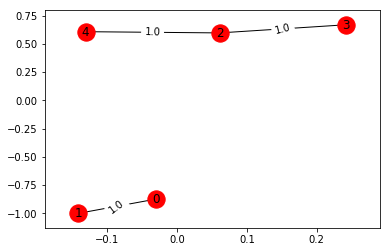

In [114]:
umap = UMAP(n_components=2, n_neighbors=2)
print(umap)
Xlu = umap.fit_transform(Xl)
plot_moons(Xlu, yl)

A = umap.graph_.todense().round(decimals=2)
G = nx.convert_matrix.from_numpy_matrix(A)
pos=nx.spring_layout(G)
# nx.draw(G,pos)
labels = nx.get_edge_attributes(G,'weight')
nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)
nx.draw_networkx(G,pos)
print(A)

In [115]:
D = np.sum(A, axis=1)
D = np.diag(D)
L = D - A
print("Laplacian:\n", L)

w, v = np.linalg.eig(L)
w = np.round(w, decimals=2)
v = np.round(v, decimals=2)
idx = np.argsort(w)
print("Eigenvalues:\n", w[idx])

print("Eigenvectors:\n", v[:,idx])

Laplacian:
 [[ 1. -1.  0.  0.  0.]
 [-1.  1.  0.  0.  0.]
 [ 0.  0.  2. -1. -1.]
 [ 0.  0. -1.  1.  0.]
 [ 0.  0. -1.  0.  1.]]
Eigenvalues:
 [ 0. -0.  1.  2.  3.]
Eigenvectors:
 [[ 0.71  0.    0.    0.71  0.  ]
 [ 0.71  0.    0.   -0.71  0.  ]
 [ 0.    0.58  0.    0.   -0.82]
 [ 0.    0.58 -0.71  0.    0.41]
 [ 0.    0.58  0.71  0.    0.41]]


In [118]:
w, v = spla.eigh(L, D)
w = np.round(w, decimals=2)
v = np.round(v, decimals=2)
idx = np.argsort(w)
print("Eigenvalues:\n", w[idx])

print("Eigenvectors:\n", v[:,idx])

Eigenvalues:
 [-0.  0.  1.  2.  2.]
Eigenvectors:
 [[ 0.   -0.71  0.   -0.71  0.  ]
 [ 0.   -0.71  0.    0.71  0.  ]
 [-0.5   0.    0.    0.    0.5 ]
 [-0.5  -0.   -0.71  0.   -0.5 ]
 [-0.5  -0.    0.71  0.   -0.5 ]]


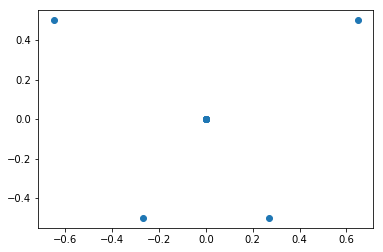

In [111]:
spectral = v[:,:2]
plt.plot(spectral[:,0], spectral[:,1], 'o')